<a href="https://colab.research.google.com/github/lcaladoferreira/dataProjects/blob/main/Automate_API_Extraction_%2B_Appending_Data_%2B_Extra_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '693934ff-6815-4485-b06c-9b9405add23c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  # print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [8]:
type(data)

dict

In [9]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11107,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971099e+07,1.971099e+07,False,NaN,1,NaN,NaN,None,2024-06-11T21:36:00.000Z,67256.622702,3.679913e+10,80.2736,-0.059410,-3.287592,-4.570514,10.040731,0.542739,-8.059209,1.325695e+12,54.3888,1.412389e+12,None,2024-06-11T21:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:38:10.228584
1,1027,Ethereum,ETH,ethereum,9056,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201430e+08,1.201430e+08,True,NaN,2,NaN,NaN,None,2024-06-11T21:36:00.000Z,3491.006893,1.901606e+10,81.3507,0.028664,-4.880803,-8.441392,19.437360,8.427138,-12.565740,4.194199e+11,17.2169,4.194199e+11,None,2024-06-11T21:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:38:10.228584
2,825,Tether USDt,USDT,tether,88280,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.124963e+11,1.150861e+11,True,NaN,3,NaN,NaN,None,2024-06-11T21:36:00.000Z,0.999810,7.190130e+10,41.2690,-0.010489,0.008710,-0.027063,0.011371,-0.067285,-0.112821,1.124749e+11,4.6145,1.150642e+11,None,2024-06-11T21:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-11 21:38:10.228584
3,1839,BNB,BNB,bnb,2181,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475844e+08,1.475844e+08,False,NaN,4,NaN,NaN,None,2024-06-11T21:36:00.000Z,604.826717,2.720518e+09,-9.1733,-0.300157,-2.094646,-9.634094,1.527209,1.268564,1.261641,8.926300e+10,3.6654,8.926300e+10,None,2024-06-11T21:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:38:10.228584
4,5426,Solana,SOL,solana,680,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.609470e+08,5.778570e+08,True,NaN,5,NaN,NaN,None,2024-06-11T21:36:00.000Z,148.488971,2.769610e+09,58.4078,-0.162517,-6.865526,-12.372864,3.391454,-2.648517,-9.072122,6.844554e+10,2.8096,8.580540e+10,None,2024-06-11T21:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:38:10.228584
5,3408,USDC,USDC,usd-coin,19691,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.202005e+10,3.202005e+10,False,NaN,6,NaN,NaN,None,2024-06-11T21:36:00.000Z,0.999962,6.710590e+09,39.6611,-0.007838,0.002427,-0.005489,-0.001684,-0.019656,0.007677,3.201884e+10,1.3148,3.201884e+10,None,2024-06-11T21:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-11 21:38:10.228584
6,52,XRP,XRP,xrp,1340,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.550616e+10,9.998755e+10,False,NaN,7,NaN,NaN,None,2024-06-11T21:37:00.000Z,0.480496,1.511547e+09,36.2168,0.095066,-3.019839,-8.460776,-3.864298,-12.382318,-29.674190,2.667049e+10,1.0952,4.804960e+10,None,2024-06-11T21:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:38:10.228584
7,74,Dogecoin,DOGE,dogecoin,985,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.446691e+11,1.446691e+11,True,NaN,8,NaN,NaN,None,2024-06-11T21:37:00.000Z,0.138219,1.265222e+09,71.5004,0.149818,-3.908835,-13.869272,-1.729437,-20.808094,-17.954876,1.999603e+10,0.8206,1.999603e+10,None,2024-06-11T21:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:38:10.228584
8,11419,Toncoin,TON,toncoin,393,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.431

In [35]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11107,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971099e+07,1.971099e+07,False,NaN,1,NaN,NaN,None,2024-06-11T21:51:00.000Z,67309.275489,3.682231e+10,80.2881,0.164470,-3.255853,-4.551690,9.920282,0.567733,-7.976792,1.326733e+12,54.4157,1.413495e+12,None,2024-06-11T21:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:53:18.596826
1,1027,Ethereum,ETH,ethereum,9056,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201430e+08,1.201430e+08,True,NaN,2,NaN,NaN,None,2024-06-11T21:50:00.000Z,3497.795706,1.904207e+10,82.4563,0.360315,-4.743116,-8.310966,19.361595,8.669966,-12.477341,4.202356e+11,17.2315,4.202356e+11,None,2024-06-11T21:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:53:18.596826
2,825,Tether USDt,USDT,tether,88280,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.124963e+11,1.150861e+11,True,NaN,3,NaN,NaN,None,2024-06-11T21:50:00.000Z,0.999803,7.195904e+10,41.4285,-0.018356,0.008226,-0.038884,0.021835,-0.055616,-0.103730,1.124741e+11,4.6131,1.150634e+11,None,2024-06-11T21:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-11 21:53:18.596826
3,1839,BNB,BNB,bnb,2181,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475844e+08,1.475844e+08,False,NaN,4,NaN,NaN,None,2024-06-11T21:50:00.000Z,606.620326,2.712675e+09,-10.0499,0.151942,-2.445033,-9.957754,1.847747,1.896972,1.717462,8.952771e+10,3.6723,8.952771e+10,None,2024-06-11T21:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:53:18.596826
4,5426,Solana,SOL,solana,680,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.609470e+08,5.778570e+08,True,NaN,5,NaN,NaN,None,2024-06-11T21:50:00.000Z,149.104309,2.767873e+09,57.1781,0.534918,-6.411691,-12.153565,3.571974,-1.442629,-9.083506,6.872918e+10,2.8182,8.616097e+10,None,2024-06-11T21:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:53:18.596826
5,3408,USDC,USDC,usd-coin,19691,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.202005e+10,3.202005e+10,False,NaN,6,NaN,NaN,None,2024-06-11T21:50:00.000Z,0.999991,6.712277e+09,39.6858,-0.014090,0.005979,-0.004285,0.009372,-0.007971,0.013914,3.201976e+10,1.3134,3.201976e+10,None,2024-06-11T21:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-11 21:53:18.596826
6,52,XRP,XRP,xrp,1340,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.550616e+10,9.998755e+10,False,NaN,7,NaN,NaN,None,2024-06-11T21:51:00.000Z,0.480836,1.514306e+09,36.0236,0.087895,-3.097336,-8.388540,-3.869076,-12.228278,-29.809991,2.668938e+10,1.0943,4.808365e+10,None,2024-06-11T21:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:53:18.596826
7,74,Dogecoin,DOGE,dogecoin,985,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.446691e+11,1.446691e+11,True,NaN,8,NaN,NaN,None,2024-06-11T21:51:00.000Z,0.138420,1.266517e+09,71.5674,0.380624,-3.816043,-13.765305,-1.748679,-20.464912,-18.109592,2.002508e+10,0.8212,2.002508e+10,None,2024-06-11T21:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:53:18.596826
8,11419,Toncoin,TON,toncoin,393,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.431743e

In [36]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [37]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11107,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19710993.00000,19710993.00000,False,NaN,1,NaN,NaN,None,2024-06-11T21:51:00.000Z,67309.27549,36822308854.36693,80.28810,0.16447,-3.25585,-4.55169,9.92028,0.56773,-7.97679,1326732658007.05737,54.41570,1413494785277.85010,None,2024-06-11T21:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:53:18.596826
1,1027,Ethereum,ETH,ethereum,9056,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120142969.93913,120142969.93913,True,NaN,2,NaN,NaN,None,2024-06-11T21:50:00.000Z,3497.79571,19042071272.63683,82.45630,0.36031,-4.74312,-8.31097,19.36160,8.66997,-12.47734,420235564384.76776,17.23150,420235564384.77002,None,2024-06-11T21:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:53:18.596826
2,825,Tether USDt,USDT,tether,88280,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112496265357.22897,115086088089.30902,True,NaN,3,NaN,NaN,None,2024-06-11T21:50:00.000Z,0.99980,71959044229.75829,41.42850,-0.01836,0.00823,-0.03888,0.02183,-0.05562,-0.10373,112474108590.64587,4.61310,115063421242.70000,None,2024-06-11T21:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-11 21:53:18.596826
3,1839,BNB,BNB,bnb,2181,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147584414.44028,147584414.44028,False,NaN,4,NaN,NaN,None,2024-06-11T21:50:00.000Z,606.62033,2712674612.17754,-10.04990,0.15194,-2.44503,-9.95775,1.84775,1.89697,1.71746,89527705544.40764,3.67230,89527705544.41000,None,2024-06-11T21:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:53:18.596826
4,5426,Solana,SOL,solana,680,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,460946986.26699,577857041.02680,True,NaN,5,NaN,NaN,None,2024-06-11T21:50:00.000Z,149.10431,2767873229.23832,57.17810,0.53492,-6.41169,-12.15356,3.57197,-1.44263,-9.08351,68729181747.81607,2.81820,86160974646.19000,None,2024-06-11T21:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:53:18.596826
5,3408,USDC,USDC,usd-coin,19691,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32020048298.65989,32020048298.65989,False,NaN,6,NaN,NaN,None,2024-06-11T21:50:00.000Z,0.99999,6712277273.90181,39.68580,-0.01409,0.00598,-0.00429,0.00937,-0.00797,0.01391,32019757422.74892,1.31340,32019757422.75000,None,2024-06-11T21:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-11 21:53:18.596826
6,52,XRP,XRP,xrp,1340,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55506158411.00000,99987553871.00000,False,NaN,7,NaN,NaN,None,2024-06-11T21:51:00.000Z,0.48084,1514305507.24864,36.02360,0.08790,-3.09734,-8.38854,-3.86908,-12.22828,-29.80999,26689384775.70917,1.09430,48083646102.99000,None,2024-06-11T21:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:53:18.596826
7,74,Dogecoin,DOGE,dogecoin,985,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144669106383.70523,144669106383.70523,True,NaN,8,NaN,NaN,None,2024-06-11T21:51:00.000Z,0.13842,1266516827.79018,71.56740,0.38062,-3.81604,-13.76531,-1.74868,-20.46491,-18.10959,20025080063.88820,0.82120,20025080063.89000,None,2024-06-11T21:51:00.000Z,NaN,

In [38]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.16447,-3.25585,-4.55169,9.92028,0.56773,-7.97679
Ethereum,0.36031,-4.74312,-8.31097,19.36160,8.66997,-12.47734
Tether USDt,-0.01836,0.00823,-0.03888,0.02183,-0.05562,-0.10373
BNB,0.15194,-2.44503,-9.95775,1.84775,1.89697,1.71746
Solana,0.53492,-6.41169,-12.15356,3.57197,-1.44263,-9.08351
USDC,-0.01409,0.00598,-0.00429,0.00937,-0.00797,0.01391
XRP,0.08790,-3.09734,-8.38854,-3.86908,-12.22828,-29.80999
Dogecoin,0.38062,-3.81604,-13.76531,-1.74868,-20.46491,-18.10959
Toncoin,0.28306,-2.85406,-3.36789,-0.04897,4.92800,60.27409


In [39]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.16447
             quote.USD.percent_change_24h    -3.25585
             quote.USD.percent_change_7d     -4.55169
             quote.USD.percent_change_30d     9.92028
             quote.USD.percent_change_60d     0.56773
             quote.USD.percent_change_90d    -7.97679
Ethereum     quote.USD.percent_change_1h      0.36031
             quote.USD.percent_change_24h    -4.74312
             quote.USD.percent_change_7d     -8.31097
             quote.USD.percent_change_30d    19.36160
             quote.USD.percent_change_60d     8.66997
             quote.USD.percent_change_90d   -12.47734
Tether USDt  quote.USD.percent_change_1h     -0.01836
             quote.USD.percent_change_24h     0.00823
             quote.USD.percent_change_7d     -0.03888
             quote.USD.percent_change_30d     0.02183
             quote.USD.percent_change_60d    -0.05562
             quote.USD.percent_change_90

In [40]:
type(df4)

pandas.core.series.Series

In [41]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.16447
            quote.USD.percent_change_24h  -3.25585
            quote.USD.percent_change_7d   -4.55169
            quote.USD.percent_change_30d   9.92028
            quote.USD.percent_change_60d   0.56773
            quote.USD.percent_change_90d  -7.97679
Ethereum    quote.USD.percent_change_1h    0.36031
            quote.USD.percent_change_24h  -4.74312
            quote.USD.percent_change_7d   -8.31097
            quote.USD.percent_change_30d  19.36160
            quote.USD.percent_change_60d   8.66997
            quote.USD.percent_change_90d -12.47734
Tether USDt quote.USD.percent_change_1h   -0.01836
            quote.USD.percent_change_24h   0.00823
            quote.USD.percent_change_7d   -0.03888
            quote.USD.percent_change_30d   0.02183
            quote.USD.percent_change_60d  -0.05562
            quote.USD.percent_change_90d  -0.10373
BNB         quote.USD.percent_change_1h    0.15194
            quote.USD.percent_change_24h  -2.44503
            quote.USD.percent_change_7d   -9.95775
            quote.USD.percent_change_30d   1.84775
            quote.USD.percent_change_60d   1.89697
            quote.USD.percent_change_90d   1.71746
Solana      quote.USD.percent_change_1h    0.53492
            quote.USD.percent_change_24h  -6.41169
            quote.USD.percent_change_7d  -12.15356
            quote.USD.percent_change_30d   3.57197
            quote.USD.percent_change_60d  -1.44263
            quote.USD.percent_change_90d  -9.08351
USDC        quote.USD.percent_change_1h   -0.01409
            quote.USD.percent_change_24h   0.00598
            quote.USD.percent_change_7d   -0.00429
            quote.USD.percent_change_30d   0.00937
            quote.USD.percent_change_60d  -0.00797
            quote.USD.percent_change_90d   0.01391
XRP         quote.USD.percent_change_1h    0.08790
            quote.USD.percent_change_24h  -3.09734
            quote.USD.percent_change_7d   -8.38854
            quote.USD.percent_change_30d  -3.86908
            quote.USD.percent_change_60d -12.22828
            quote.USD.percent_change_90d -29.80999
Dogecoin    quote.USD.percent_change_1h    0.38062
            quote.USD.percent_change_24h  -3.81604
            quote.USD.percent_change_7d  -13.76531
            quote.USD.percent_change_30d  -1.74868
            quote.USD.percent_change_60d -20.46491
            quote.USD.percent_change_90d -18.10959
Toncoin     quote.USD.percent_change_1h    0.28306
            quote.USD.percent_change_24h  -2.85406
            quote.USD.percent_change_7d   -3.36789
            quote.USD.percent_change_30d  -0.04897
            quote.USD.percent_change_60d   4.92800
            quote.USD.percent_change_90d  60.27409
Cardano     quote.USD.percent_change_1h   -0.01142
            quote.USD.percent_change_24h  -3.94768
            quote.USD.percent_change_7d   -8.37579
            quote.USD.percent_change_30d  -3.34814
            quote.USD.percent_change_60d -15.21452
            quote.USD.percent_change_90d -43.78553
Shiba Inu   quote.USD.percent_change_1h    0.45635
            quote.USD.percent_change_24h  -4.54926
            quote.USD.percent_change_7d  -10.25403
            quote.USD.percent_change_30d  -1.97273
            quote.USD.percent_change_60d -10.42696
            quote.USD.percent_change_90d -31.73804
Avalanche   quote.USD.percent_change_1h   -0.59236
            quote.USD.percent_change_24h  -2.71490
            quote.USD.percent_change_7d  -12.31535
            quote.USD.percent_change_30d  -5.19914
            quote.USD.percent_change_60d -19.46555
            quote.USD.percent_change_90d -42.56719
TRON        quote.USD.percent_change_1h    0.13804
            quote.USD.percent_change_24h  -0.58861
            quote.USD.percent_change_7d    2.04599
            quote.USD.percent_change_30d  -8.09578
            quote.USD.percent_change_60d   1.80489
            quo

from matplotlib import pyplot as plt
df5['values'].plot(kind='hist', bins=20, title='values')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df5['values'].plot(kind='line', figsize=(8, 4), title='values')
plt.gca().spines[['top', 'right']].set_visible(False)

In [42]:
df5.count()

values    90
dtype: int64

In [43]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,values
0,0.16447
1,-3.25585
2,-4.55169
3,9.92028
4,0.56773
5,-7.97679
6,0.36031
7,-4.74312
8,-8.31097
9,19.36160


from matplotlib import pyplot as plt
df6['values'].plot(kind='hist', bins=20, title='values')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df6['values'].plot(kind='line', figsize=(8, 4), title='values')
plt.gca().spines[['top', 'right']].set_visible(False)

In [44]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,values
0,0.16447
1,-3.25585
2,-4.55169
3,9.92028
4,0.56773
5,-7.97679
6,0.36031
7,-4.74312
8,-8.31097
9,19.36160


from matplotlib import pyplot as plt
df7['values'].plot(kind='hist', bins=20, title='values')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df7['values'].plot(kind='line', figsize=(8, 4), title='values')
plt.gca().spines[['top', 'right']].set_visible(False)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,67256.622702,2024-06-11 21:38:10.228584


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

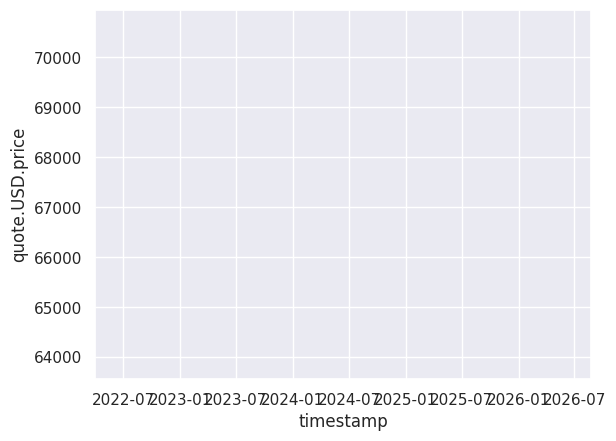

In [47]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)